<a href="https://colab.research.google.com/github/linlih/ML_Exercise/blob/master/COVID19_Global_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 比赛说明


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [139]:
!kaggle competitions download -c covid19-global-forecasting-week-4

  0% 0.00/388k [00:00<?, ?B/s]
100% 388k/388k [00:00<00:00, 56.5MB/s]
  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 37.0MB/s]
  0% 0.00/950k [00:00<?, ?B/s]
100% 950k/950k [00:00<00:00, 58.7MB/s]


In [0]:
import numpy as np
import pandas as pd

data = pd.read_csv('train.csv')

In [142]:
print(data.head()) # 查看前五行信息
print(data.info()) # 查看数据描述，总行数，每个属性的类型，非空数值的数量
print(data.describe()) # 数值属性类型的概括

   Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              25040 non-null  int64  
 1   Province_State  10640 non-null  object 
 2   Country_Region  25040 non-null  object 
 3   Date            25040 non-null  object 
 4   ConfirmedCases  25040 non-null  float64
 5   Fatalities      25040 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB
None
         

In [0]:
# 输出行数过多会被省略
# import pandas
# pandas.set_option('display.max_columns',200) #设置显示列数
# pandas.set_option('display.max_rows',100) #设置显示行数

data['Province_State'].value_counts() # 查看具体项中有哪些类别

In [0]:
# % matplotlib inline
# import matplotlib.pyplot as plt
# data.hist(bins=50, figsize=(20, 15))
# plt.show()

In [143]:
# 如何将国家的分离开，并进行训练
country_name = data['Country_Region'].unique() # 获取所有国家的名字
print(country_name.size)

184


In [0]:
%%time
# 使用字典的方式来实现
train_data = {}

# 更新国家名字
for i in range(len(country_name)):
  train_data[country_name[i]] = []

# 按照国家分类数据
# 有个比较麻烦的地方，有的国家的数据是细分到省份或者州，所以要加入省份信息，很多国家没有这一行数据，所以可以要进行区分
for i in range(data.shape[0]):
  # 处理时间特征
  date_tmp = pd.to_datetime(data.iloc[i]['Date'], format='%Y-%m-%d',errors = 'coerce')

  if pd.isnull(data.iloc[i]['Province_State']):
    train_data[data.iloc[i]['Country_Region']].append([date_tmp.month, date_tmp.day, data.iloc[i]['ConfirmedCases'], data.iloc[i]['Fatalities']])
  else:
    train_data[data.iloc[i]['Country_Region']].append([data.iloc[i]['Province_State'], date_tmp.month, date_tmp.day, data.iloc[i]['ConfirmedCases'], data.iloc[i]['Fatalities']])

  # train_data[data.iloc[i]['Country_Region']].append([data.iloc[i]['Date'], data.iloc[i]['ConfirmedCases'], data.iloc[i]['Fatalities']])
  # train_data[data.iloc[i]['Country_Region']].append(data.iloc[i]['Date'])
  # train_data[data.iloc[i]['Country_Region']].append(data.iloc[i]['ConfirmedCases'])
  # train_data[data.iloc[i]['Country_Region']].append(data.iloc[i]['Fatalities'])

CPU times: user 25.7 s, sys: 23.3 ms, total: 25.7 s
Wall time: 25.7 s


In [6]:
%%time
train_data = {}
country_tmp = ''

for i in range(len(range(data.shape[0]))):
  country = data.iloc[i]['Country_Region']
  if (country != country_tmp):
    if not pd.isnull(data.iloc[i]['Province_State']):
      train_data[country] = pd.DataFrame([],columns=['Province_State', 'Month','Day', 'ConfirmedCases', 'Fatalities'])
    else:
      train_data[country] = pd.DataFrame([],columns=['Month','Day', 'ConfirmedCases', 'Fatalities'])
    country_tmp = country
    continue
for i in range(data.shape[0]):
  # 处理时间特征
  date_tmp = pd.to_datetime(data.iloc[i]['Date'], format='%Y-%m-%d',errors = 'coerce')

  if pd.isnull(data.iloc[i]['Province_State']):
    train_data[data.iloc[i]['Country_Region']] = train_data[data.iloc[i]['Country_Region']].append(
        [{'Month': date_tmp.month, 'Day': date_tmp.day, 'ConfirmedCases': data.iloc[i]['ConfirmedCases'], 'Fatalities': data.iloc[i]['Fatalities']}], 
        ignore_index = True)
  else:
    train_data[data.iloc[i]['Country_Region']] = train_data[data.iloc[i]['Country_Region']].append(
        [{'Province_State': data.iloc[i]['Province_State'], 'Month': date_tmp.month, 'Day': date_tmp.day, 'ConfirmedCases': data.iloc[i]['ConfirmedCases'], 'Fatalities': data.iloc[i]['Fatalities']}], 
        ignore_index = True)


CPU times: user 1min 51s, sys: 89.1 ms, total: 1min 52s
Wall time: 1min 52s


In [8]:
# date_tmp = pd.to_datetime(data.iloc[0]['Date'], format='%Y-%m-%d',errors = 'coerce')
#         [{'Province_State': 12, 'Month': 3, 'Day': 3, 'ConfirmedCases': 3, 'Fatalities': 3}], 
#         ignore_index = True)
train_data['China']

,Province_State,Month,Day,ConfirmedCases,Fatalities
0,Anhui,1,22,1.0,0.0
1,Anhui,1,23,9.0,0.0
2,Anhui,1,24,15.0,0.0
3,Anhui,1,25,39.0,0.0
4,Anhui,1,26,60.0,0.0
...,...,...,...,...,...
2536,Zhejiang,4,3,1260.0,1.0
2537,Zhejiang,4,4,1262.0,1.0
2538,Zhejiang,4,5,1263.0,1.0
2539,Zhejiang,4,6,1264.0,1.0


In [0]:
# 得到按照国家为关键字的数据字典，都是2020年的数据，所以去掉了年份信息
# 不含有省份或者州信息的国家，去掉该栏信息

### 绘图

reference: https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions#1.-Exploratory-data-analysis-(EDA)-

Text(0.5, 20.200000000000003, 'Date')

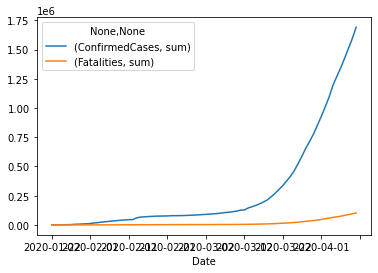

In [150]:
confirmed_total_date = data.groupby(['Date']).agg({'ConfirmedCases':['sum']}) # 按照日期进行分组，对确诊病例进行累加
fatalities_total_date = data.groupby(['Date']).agg({'Fatalities':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

# 绘制成两张图，第一张是确诊病例和死亡人数汇总的，第二章是死亡
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot()
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

In [0]:
train = data

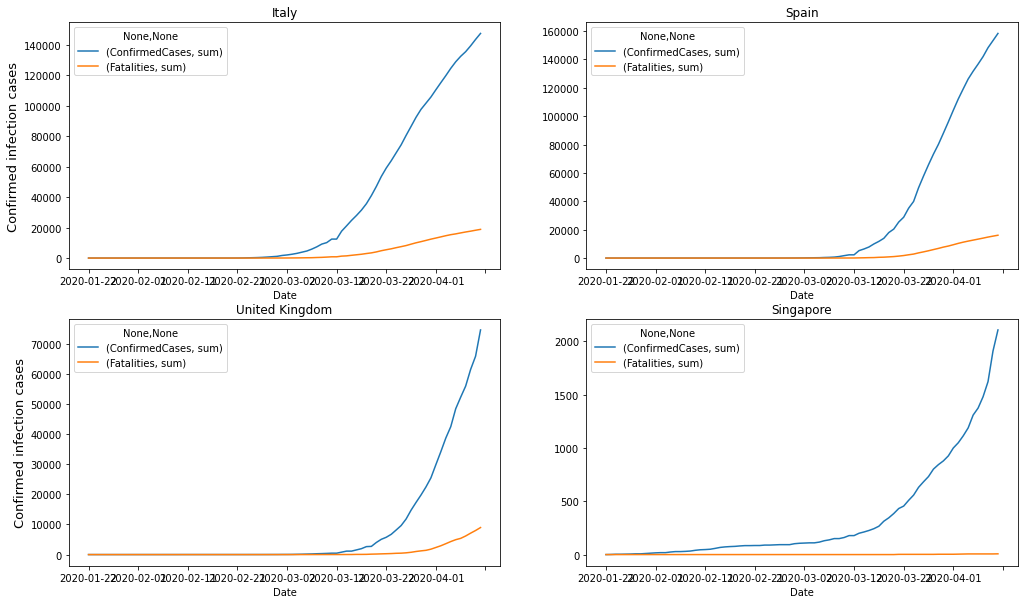

In [173]:
confirmed_total_date_Italy = train[train['Country_Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train[train['Country_Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

confirmed_total_date_Spain = train[train['Country_Region']=='Spain'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = train[train['Country_Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

confirmed_total_date_UK = train[train['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = train[train['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

confirmed_total_date_Australia = train[train['Country_Region']=='Australia'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Australia = train[train['Country_Region']=='Australia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)

confirmed_total_date_Singapore = train[train['Country_Region']=='Singapore'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Singapore = train[train['Country_Region']=='Singapore'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')

# 思路

提供的是每个国家的按照时间推移的确诊病例数量，所以可以考虑分别对每个国家进行分别训练，但是这样也存在问题就是，个别国家的统计的数据量较少，预测的准确性上需要验证

将日期分割为月和天，有身份信息的再将其省份转换为数值特征，然后对Month, Day, Province都进行Onehot编码，然后进行训练

这个处理方法训练得到的结果，效果都很差

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

month_encoder = OneHotEncoder()
month_1hot = month_encoder.fit_transform(train_data['Spain']['Month'].values.reshape(-1,1))
day_encoder = OneHotEncoder()
day_1hot = day_encoder.fit_transform(train_data['Spain']['Day'].values.reshape(-1,1))

# 对于类别特征，先要转化成数值特征，然后在OneHot编码，使用LabelBinarizer内在包含了这两步
# prov_encoder = LabelBinarizer()
# province_1hot = prov_encoder.fit_transform(train_data['Spain']['Province_State'])

# print(province_1hot.shape, " ", month_1hot.shape, " ", day_1hot.shape) # (2541, 33)   (2541, 4)   (2541, 31)

# 将所有的数据统一到一个矩阵中
data_prepared = np.hstack((month_1hot.toarray(), day_1hot.toarray(), train_data['Spain']['ConfirmedCases'].values.reshape(-1, 1), train_data['Spain']['Fatalities'].values.reshape(-1, 1)))

In [0]:
x = data_prepared[:,:-2]; y = data_prepared[:,-2:-1]

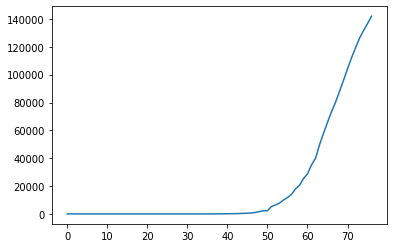

In [159]:
plt.plot(y)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

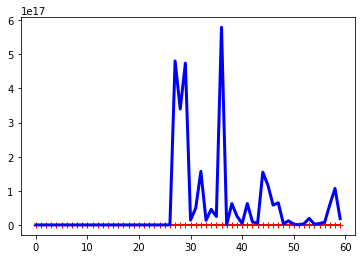

In [158]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

In [162]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
y_pred = lin_reg.predict(x_train)
print(mean_squared_error(y_pred, y_train))

136114497.13114753


In [169]:
print(y_pred.reshape(1,-1))
print(y_train.reshape(1,-1))

[[ -2272.  -9168.  -7744.  -9776.   8592.    128.   2496.    -16.  23792.
   44416.  19296.  20688.  14208.  -7824.  10640.  -7696. -14640.  43360.
   46896.  18320.   6192. 122768.  25392. 130464.  -9984.  -9456.  14512.
     -16. 126976.  -4336.  11168.  12928.  11424.  49184.  32048. 128688.
    5600.  26272.  10352.  12800. 120368.  52288.    208.  38944.  10848.
   11456.  -3360.  28560.  -1328. -12032.   3520. 138320.  -6112. -14432.
   -6416.  67376.  95968.    -16.  -3328.  17264. -10272.]]
[[     0.      2.      0.      2.    165.      0.      0.      2.     15.
   65719.  17963.      0.   7798.      1.    673.      2.      0.  39885.
   73235.      6.    120. 119199.  25374. 126168.      1.      2.    400.
       2. 131646.      1.   1695.   5232.      2.  80110.  28768. 136675.
       0.     32.     84.    259. 112065.  57786.      0.  49515.   1073.
    2277.      2.     45.      2.      1.      1. 141942.      1.      1.
       2.  87956.  95923.      2.      0.  13910.   

In [0]:
import numpy as np
np.set_printoptions(suppress=True)

In [0]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.6)
lasso_reg.fit(x_train, y_train)

In [165]:
lasso_reg.predict([x[50]])

array([11460.29417803])

In [0]:
y_pred = lasso_reg.predict(x_test)

In [116]:
mean_squared_error(y_pred, y_test)

19324007.171580296

In [166]:
y[50]

array([2277.])

In [114]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred = elastic_net.predict(x_test)

In [86]:
y[100]

array([372.,   3.])

In [59]:
y

array([[1264.,    1.],
       [1264.,    1.],
       [1264.,    1.],
       ...,
       [1264.,    1.],
       [1264.,    1.],
       [1265.,    1.]])

In [0]:
# 利用线性回归来测试
from sklearn.linear_model import ridge_regression
ridge_regression(x, y)

In [170]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000)
model.fit(x_train, y_train)

[11:03:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [171]:
model.predict(x_test)

array([ -1003.4467,   4841.5327,  19891.713 ,  18868.785 ,  60870.367 ,
        16673.916 ,  19906.63  ,  19968.178 ,  18868.785 ,  22127.988 ,
        35821.996 ,  -1003.4467,  19163.93  ,   1983.8649, 116955.71  ,
        28016.8   ], dtype=float32)

In [172]:
y_test

array([[     2.],
       [     2.],
       [  9942.],
       [ 11748.],
       [     0.],
       [   222.],
       [  2277.],
       [ 20410.],
       [  6391.],
       [ 35136.],
       [    13.],
       [     2.],
       [     2.],
       [     2.],
       [104118.],
       [   500.]])

In [234]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def PolyLin(degree):
    return Pipeline(
    [
        ("poly",PolynomialFeatures(degree=degree)),
        ("Linearmodel",LinearRegression())
    ])
lin_3 = PolyLin(degree=3)
lin_3.fit(x_train,y_train)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Linearmodel',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
y_predict3 = lin_3.predict(x_train)

In [236]:
y_predict3[0]

array([673.])

In [237]:
y_train[0]

array([673.])

In [238]:
print(y_train.reshape(1,-1))
print(y_predict3.reshape(1,-1))

[[   673.      1.      0.  80110.  11748.  73235.      6. 126168.      2.
   95923.    120.     15.     84.  65719.      2.      2.      1.   1695.
       2. 112065.      2.      1.    400.    500.  87956.      1.      1.
   28768.      0.   1073.     32.   2277.      0. 136675.      1.      0.
       2.      2.      1.      2.  17963.      0.      1.  35136.     13.
   25374.   6391.      0.      2. 104118. 141942.      0.      0.      2.
   39885.      0.    259.  20410.    165.      2.      0.]]
[[   673.      1.      0.  80110.  11748.  73235.      6. 126168.      2.
   95923.    120.     15.     84.  65719.      2.      2.      1.   1695.
       2. 112065.      2.      1.    400.    500.  87956.      1.      1.
   28768.      0.   1073.     32.   2277.     -0. 136675.      1.     -0.
       2.      2.      1.      2.  17963.     -0.      1.  35136.     13.
   25374.   6391.      0.      2. 104118. 141942.     -0.     -0.      2.
   39885.      0.    259.  20410.    165.      2.   

In [0]:
plt.plot()

In [239]:
print(mean_squared_error(y_train, y_predict3))

5.316042998728334e-20


## Reference

https://www.kaggle.com/abhijithchandradas/global-forcast-covid19-logisticregression

In [174]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sub = pd.read_csv('submission.csv')

print(df_train.shape)
print(df_test.shape)
print(df_sub.shape)

(25040, 6)
(13459, 4)
(13459, 3)


In [176]:
print("Unique Countries:", len(df_train.Country_Region.unique()))
print("Period:", len(df_train.Date.unique()))
print("From:", df_train.Date.min(), "To:", df_train.Date.max())

Unique Countries: 184
Period: 80
From: 2020-01-22 To: 2020-04-10


In [178]:
# 给的数据国家地区这一栏不为空，都有信息
# print(f"Number of rows without Country_Region : {df_train.Country_Region.isna().sum()}")

df_train["UniqueRegion"]=df_train.Country_Region # 新增一行
df_train.UniqueRegion[df_train.Province_State.isna()==False]=df_train.Province_State+" , "+df_train.Country_Region
df_train[df_train.Province_State.isna()==False]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,UniqueRegion
640,913,Australian Capital Territory,Australia,2020-01-22,0.0,0.0,"Australian Capital Territory , Australia"
641,914,Australian Capital Territory,Australia,2020-01-23,0.0,0.0,"Australian Capital Territory , Australia"
642,915,Australian Capital Territory,Australia,2020-01-24,0.0,0.0,"Australian Capital Territory , Australia"
643,916,Australian Capital Territory,Australia,2020-01-25,0.0,0.0,"Australian Capital Territory , Australia"
644,917,Australian Capital Territory,Australia,2020-01-26,0.0,0.0,"Australian Capital Territory , Australia"
...,...,...,...,...,...,...,...
24315,34618,Turks and Caicos Islands,United Kingdom,2020-04-06,8.0,1.0,"Turks and Caicos Islands , United Kingdom"
24316,34619,Turks and Caicos Islands,United Kingdom,2020-04-07,8.0,1.0,"Turks and Caicos Islands , United Kingdom"
24317,34620,Turks and Caicos Islands,United Kingdom,2020-04-08,8.0,1.0,"Turks and Caicos Islands , United Kingdom"
24318,34621,Turks and Caicos Islands,United Kingdom,2020-04-09,8.0,1.0,"Turks and Caicos Islands , United Kingdom"


In [179]:
# 丢弃掉Id，Province_State,Country_Region这几列
df_train.drop(labels=['Id', 'Province_State', 'Country_Region'], axis=1, inplace=True)
df_train

,Date,ConfirmedCases,Fatalities,UniqueRegion
0,2020-01-22,0.0,0.0,Afghanistan
1,2020-01-23,0.0,0.0,Afghanistan
2,2020-01-24,0.0,0.0,Afghanistan
3,2020-01-25,0.0,0.0,Afghanistan
4,2020-01-26,0.0,0.0,Afghanistan
...,...,...,...,...
25035,2020-04-06,10.0,1.0,Zimbabwe
25036,2020-04-07,11.0,2.0,Zimbabwe
25037,2020-04-08,11.0,3.0,Zimbabwe
25038,2020-04-09,11.0,3.0,Zimbabwe


In [180]:
print("Test Data EDA")
print("Period:", len(df_test.Date.unique()))
print("From:", df_test.Date.min(), "To:", df_test.Date.max())

Test Data EDA
Period: 43
From: 2020-04-02 To: 2020-05-14


In [181]:
df_test["UniqueRegion"]=df_test.Country_Region
df_test.UniqueRegion[df_test.Province_State.isna()==False]=df_test.Province_State+" , "+df_test.Country_Region
df_test.drop(labels=["Province_State","Country_Region"], axis=1, inplace=True)
len(df_test.UniqueRegion.unique())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


313

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [185]:
%%time
final_df=pd.DataFrame(columns=["Date","ConfirmedCases","Fatalities","UniqueRegion"])

df_test_temp=pd.DataFrame()
df_test_temp["Date"]=df_test.Date
df_test_temp["ConfirmedCases"]=0.0
df_test_temp["Fatalities"]=0.0
df_test_temp["UniqueRegion"]=df_test.UniqueRegion
df_test_temp["Delta"]=1.0

# 针对不同的国家地区进行处理
for region in df_train.UniqueRegion.unique():
    df_temp=df_train[df_train.UniqueRegion==region].reset_index()
    df_temp["Delta"]=1.0
    size_train=df_temp.shape[0]
    for i in range(1,df_temp.shape[0]):
        if(df_temp.ConfirmedCases[i-1]>0): # 如果前面一天的确诊病例大于0，计算今日确诊病例和昨日确诊病例的增加比例
            df_temp.Delta[i]=df_temp.ConfirmedCases[i]/df_temp.ConfirmedCases[i-1]

    #number of days for delta trend
    n=5     

    #delta as average of previous n days
    delta_avg=df_temp.tail(n).Delta.mean()

    #delta as trend for previous n days
    delta_list=df_temp.tail(n).Delta

    #Morality rate as on last availabe date
    death_rate=df_temp.tail(1).Fatalities.sum()/df_temp.tail(1).ConfirmedCases.sum()

    df_test_app=df_test_temp[df_test_temp.UniqueRegion==region]
    df_test_app=df_test_app[df_test_app.Date>df_temp.Date.max()]

    X=np.arange(1,n+1).reshape(-1,1)
    Y=delta_list # 预测的是增长的百分比信息
    model=LinearRegression()
    model.fit(X,Y)

    df_temp=pd.concat([df_temp,df_test_app])
    df_temp=df_temp.reset_index()

    for i in range (size_train, df_temp.shape[0]):
        n=n+1
        df_temp.Delta[i]=max(1,model.predict(np.array([n]).reshape(-1,1))[0])
        # round函数用于四舍五入，预测值为当前的病例数目，乘以相应的确诊增长率
        df_temp.ConfirmedCases[i]=round(df_temp.ConfirmedCases[i-1]*df_temp.Delta[i],0)
        # 这里其实有点投机取巧，直接用死亡率乘以这个确诊病例数
        # 但是这个死亡率是直接按照最后一个数据进行计算的，不是动态的
        df_temp.Fatalities[i]=round(death_rate*df_temp.ConfirmedCases[i],0)

    size_test=df_temp.shape[0]-df_test_temp[df_test_temp.UniqueRegion==region].shape[0]

    df_temp=df_temp.iloc[size_test:,:]
    
    df_temp=df_temp[["Date","ConfirmedCases","Fatalities","UniqueRegion"]]
    final_df=pd.concat([final_df,df_temp], ignore_index=True)
    
final_df.shape

CPU times: user 13.6 s, sys: 1.04 ms, total: 13.6 s
Wall time: 13.6 s


In [186]:
print(final_df.shape)

(13459, 4)


In [187]:
final_df

,Date,ConfirmedCases,Fatalities,UniqueRegion
0,2020-04-02,273.0,6.0,Afghanistan
1,2020-04-03,281.0,6.0,Afghanistan
2,2020-04-04,299.0,7.0,Afghanistan
3,2020-04-05,349.0,7.0,Afghanistan
4,2020-04-06,367.0,11.0,Afghanistan
...,...,...,...,...
13454,2020-05-10,807.0,186.0,Zimbabwe
13455,2020-05-11,981.0,226.0,Zimbabwe
13456,2020-05-12,1196.0,276.0,Zimbabwe
13457,2020-05-13,1463.0,338.0,Zimbabwe
